<h1>Vehicle Insurance Prediction</h1>

### Description
In This Project I am analysing a dataset from an Insurance company who has provided `Health Insurance` to it's customers and now I am predicting weather the policyholders are intrseted in `vehicle insurance`.

### Approach

  - At first I did Exploratory Data Analysis for understanding business problem, visualising and analysing relationships and obtaining Insights.
  - Then I Cleaned up data from outliers to obtain precise results.
  - I did feature engineering where I encode data using LabelEncoder and removing multicollinearity.
  - Then I performed pre-processing using standard scaler and min_max scaler.
  - Also I handeled data imbalance by resampling minorities.
  - Then I splitted the data into training and testing sets.
  - I looked for the best algorithm for modeling data.
  - Then I performed hyper parameter tuning using gridSearchCV.
  - And finally, I evaluated model using classification results and confusion matrix.
  - I also found feature importance for our training dataset.

### Tech-stacks Used
    I used JupyterLab notebook for analysing and visualising datasets also it helps to create markdowns.
    Also I installed Anaconda for necessary support of libraries.

## Exploratory Data Analysis

In [ ]:
# Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('RdBu')

In [ ]:
# Loading csv file into pandas dataframe
df= pd.read_csv('/home/shakti/Downloads/health_insurance.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#Replacing 0 with 'No' & 1 with 'Yes' in 'Driving_License', 'Previously_Insured', & 'Response'

df["Driving_License"] = df["Driving_License"].replace({0:"No",1:"Yes"})
df["Previously_Insured"] = df["Previously_Insured"].replace({0:"No",1:"Yes"})
df["Response"] = df["Response"].replace({0:"No",1:"Yes"})

In [ ]:
# Finding unique values in categorical column
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("-"*21)

Unique values of  Gender {'Male', 'Female'}
---------------------
Unique values of  Driving_License {'No', 'Yes'}
---------------------
Unique values of  Previously_Insured {'No', 'Yes'}
---------------------
Unique values of  Vehicle_Age {'1-2 Year', '< 1 Year', '> 2 Years'}
---------------------
Unique values of  Vehicle_Damage {'No', 'Yes'}
---------------------
Unique values of  Response {'No', 'Yes'}
---------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.9+ MB


In [ ]:
# Number of unique values in different columns
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

### Understanding Business Problem
    To understand Business problem we use countplot on our target variable

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


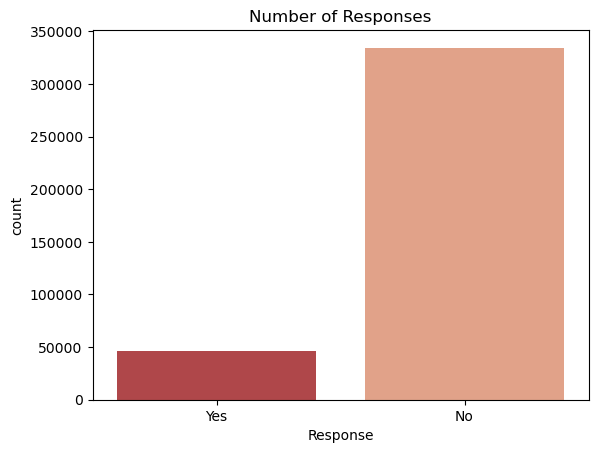

In [ ]:
sns.countplot(df['Response'])
plt.title('Number of Responses')
plt.show()

    From the above graph it is clear that people who didnot opt for vehicle insurance is higher than people who are intrested.

### Visualising and Analysing Relationships

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


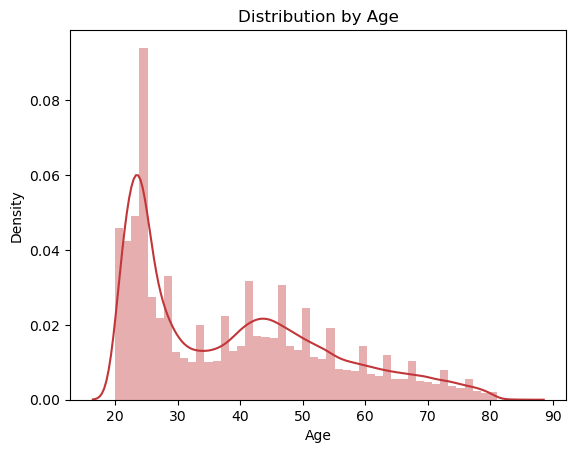

In [ ]:
# Distribution By Age
sns.distplot(df['Age'], kde=True)
plt.title('Distribution by Age')
plt.show()

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


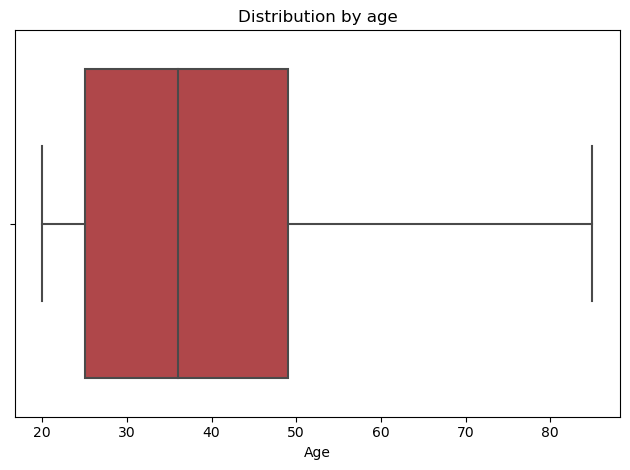

In [ ]:
# Distribution by Age in BoxPlot
sns.boxplot(df['Age'])
plt.title('Distribution by age')
plt.tight_layout()
plt.show()

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


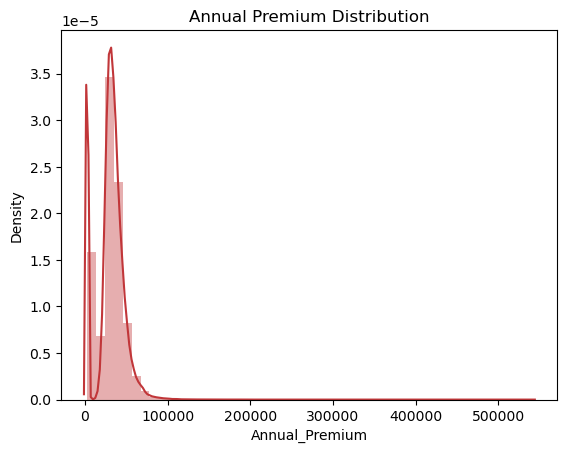

In [ ]:
# Distribution of Annual Premium
sns.distplot(df['Annual_Premium'])
plt.title('Annual Premium Distribution')
plt.show()

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


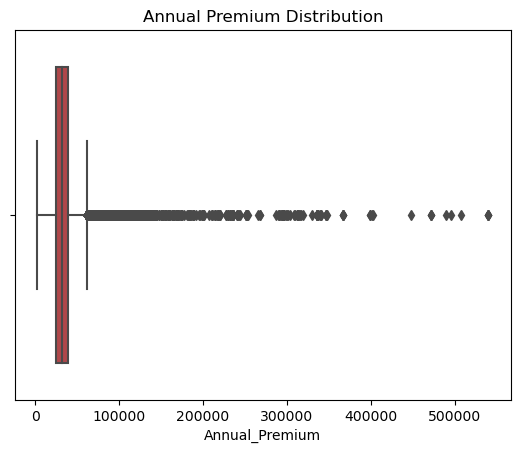

In [ ]:
# Distribution of Annual Premium
sns.boxplot(df['Annual_Premium'])
plt.title('Annual Premium Distribution')
plt.show()

    We have significant outliers in Annual Premium variable

In [ ]:
# Count of Different Sales Channel
Sales_ch = pd.DataFrame(df.groupby('Policy_Sales_Channel')['id'].count())

In [ ]:
#from tabulate import tabulate
#print(tabulate(Sales_ch, headers='keys', tablefmt='fancy_grid'))

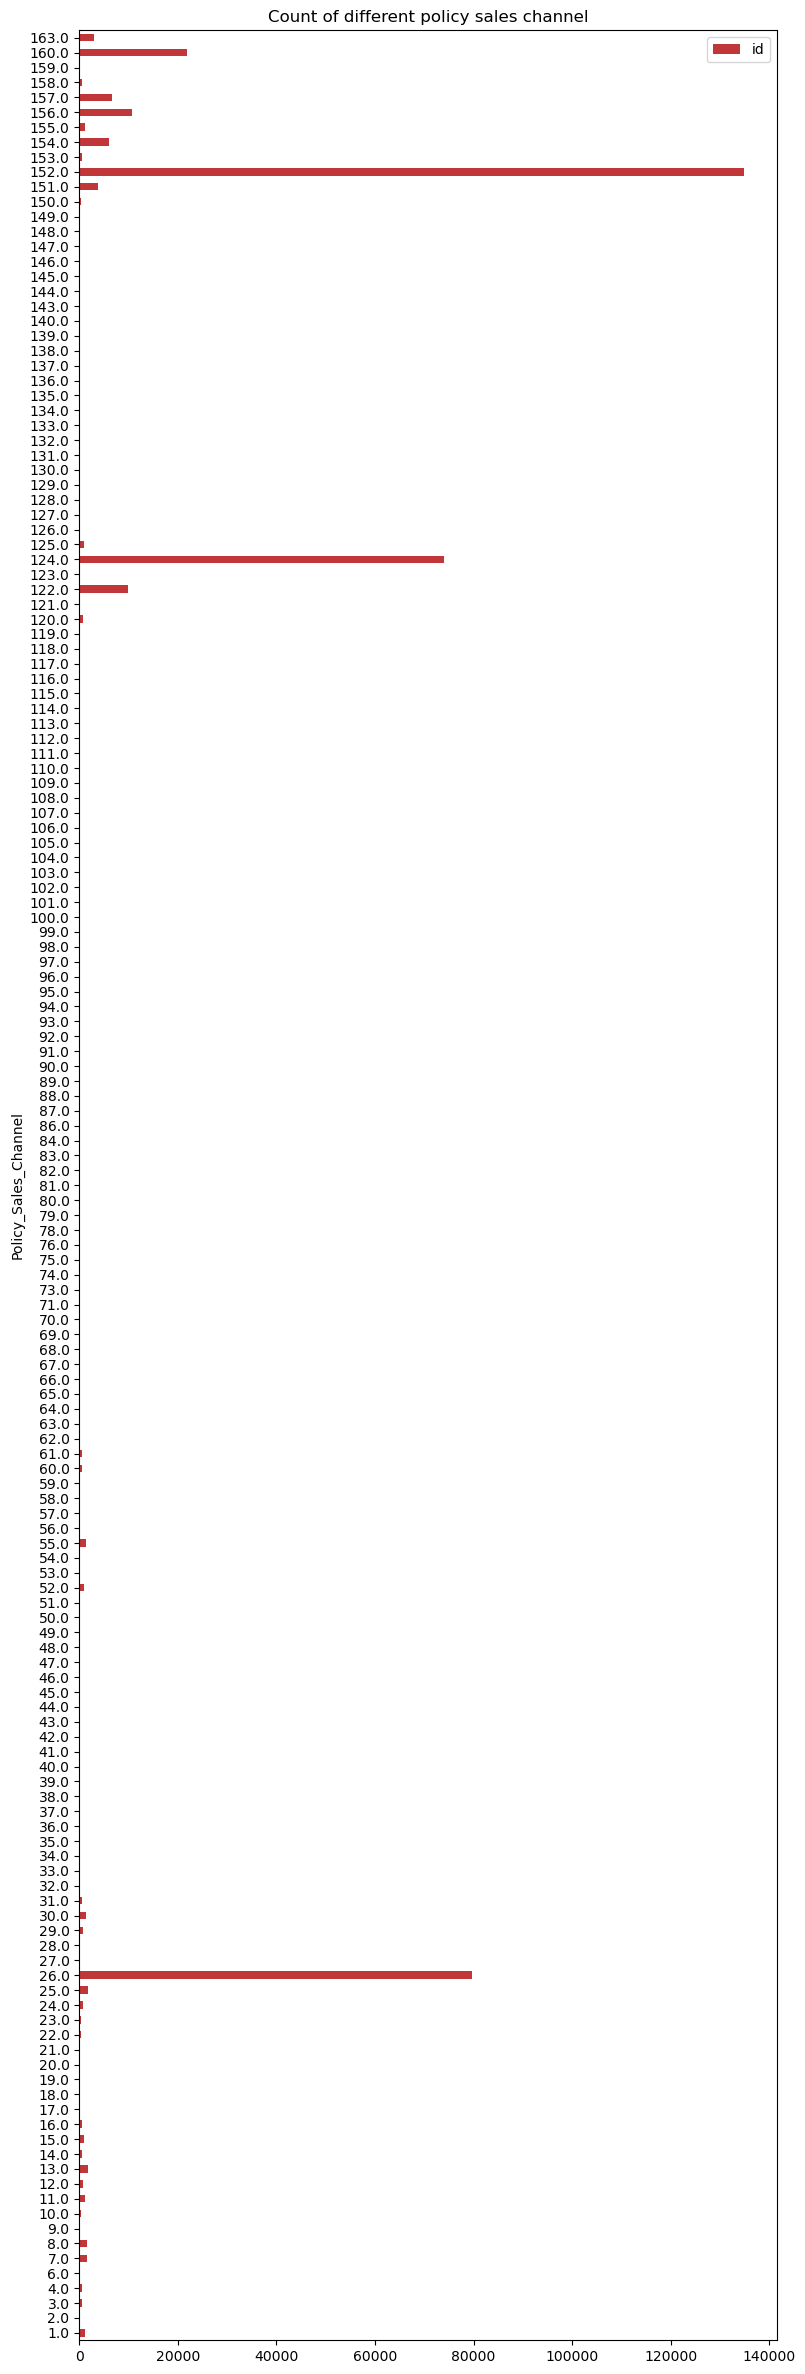

In [ ]:
# Visualising counts of different sales channel
Sales_ch.plot( figsize=(9,30), kind='barh', title='Count of different policy sales channel')
plt.show()

### Obtaining Insights

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


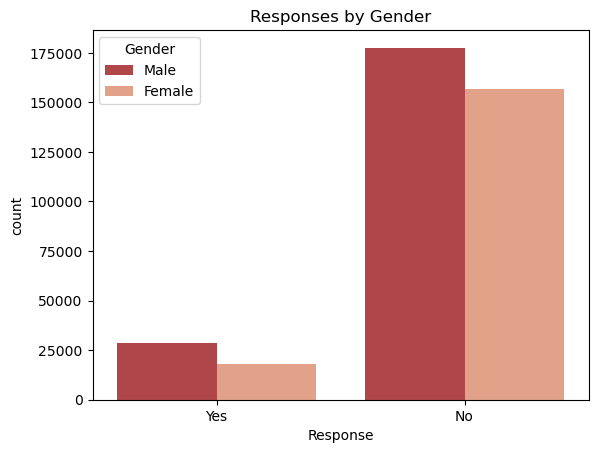

In [ ]:
# Do male customers tend to respond more
sns.countplot(df['Response'],hue=df['Gender'])
plt.title('Responses by Gender')
plt.show()

    From the above graph we can conclude that male customers are higher in responding and not responding more than female customers

In [ ]:
# Count of male and female customers by their responses
df.groupby(['Response','Gender'])['id'].agg('count')

Response  Gender
No        Female    156835
          Male      177564
Yes       Female     18185
          Male       28525
Name: id, dtype: int64

In [ ]:
# Response rate of Male customers
df[df['Gender']=='Male'].groupby(['Response','Gender'])['id'].agg('count')/len(df[df['Gender']=='Male'])

Response  Gender
No        Male      0.861589
Yes       Male      0.138411
Name: id, dtype: float64

In [ ]:
# Response rate of female customers
df[df['Gender']=='Female'].groupby(['Response','Gender'])['id'].agg('count')/len(df[df['Gender']=='Female'])

Response  Gender
No        Female    0.896098
Yes       Female    0.103902
Name: id, dtype: float64

    From the above metrics we can conclude that Male customers tend to respond higher than female customers

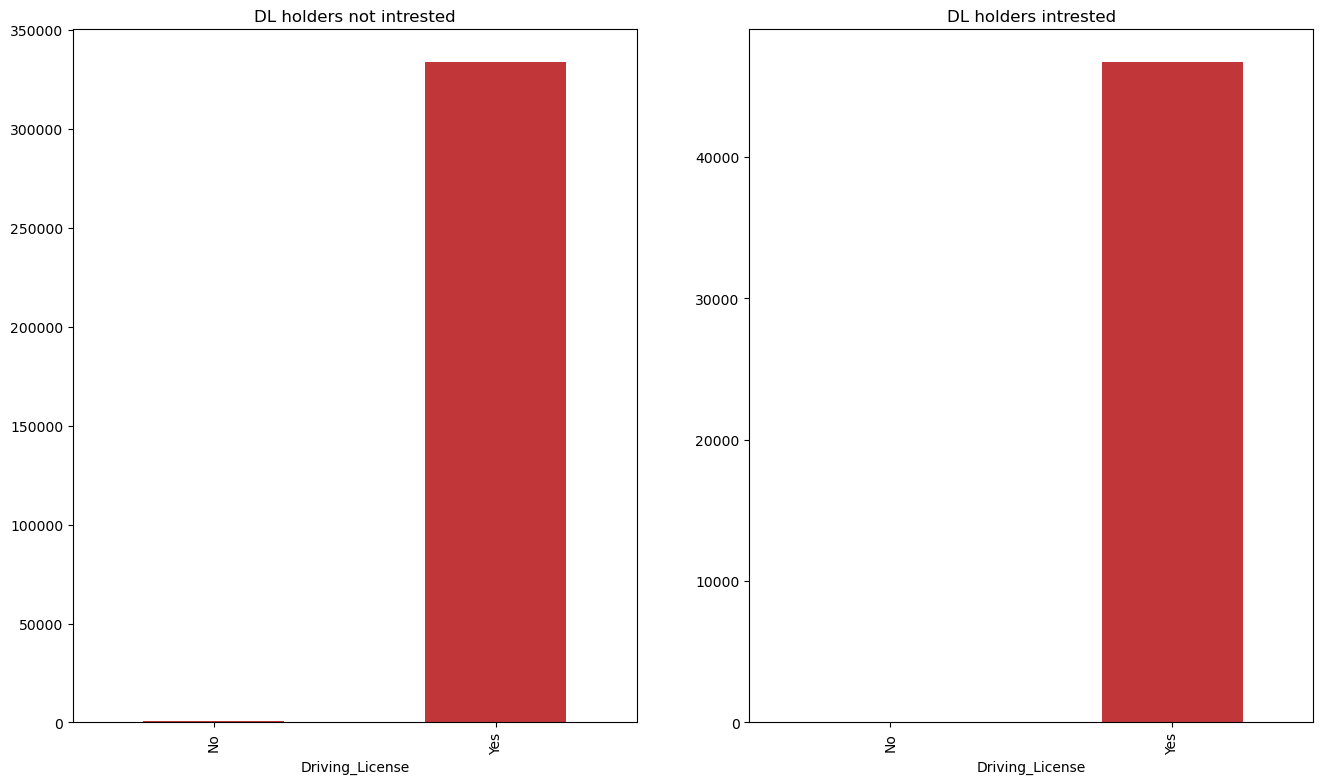

In [ ]:
# Responses by DL Holders
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
df[df['Response']=='No'].groupby('Driving_License')['id'].count().plot(kind='bar')
plt.title('DL holders not intrested')
plt.subplot(1,2,2)
df[df['Response']=='Yes'].groupby('Driving_License')['id'].count().plot(kind='bar')
plt.title('DL holders intrested')
plt.show()

In [ ]:
# Response rate by DL holders
df[df['Driving_License']=='Yes'].groupby(['Response','Driving_License'])['id'].agg('count')/len(df[df['Driving_License']=='Yes'])

Response  Driving_License
No        Yes                0.877283
Yes       Yes                0.122717
Name: id, dtype: float64

In [ ]:
# Response rate by DL holders
df[df['Driving_License']=='No'].groupby(['Response','Driving_License'])['id'].agg('count')/len(df[df['Driving_License']=='No'])

Response  Driving_License
No        No                 0.949507
Yes       No                 0.050493
Name: id, dtype: float64

    From the above metrics we can conclude that DL holders tend to respond more

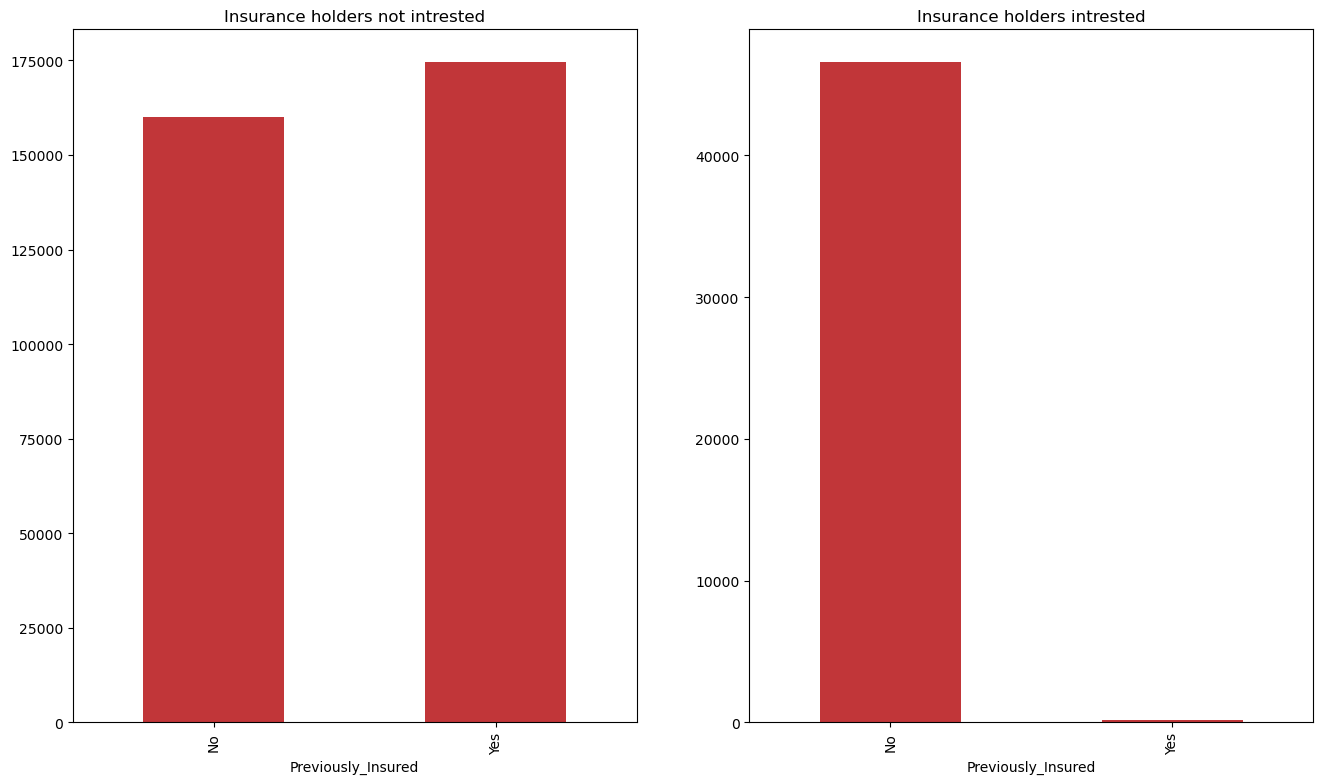

In [ ]:
# Responses by policy holders
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
df[df['Response']=='No'].groupby('Previously_Insured')['id'].count().plot(kind='bar')
plt.title('Insurance holders not intrested')
plt.subplot(1,2,2)
df[df['Response']=='Yes'].groupby('Previously_Insured')['id'].count().plot(kind='bar')
plt.title('Insurance holders intrested')
plt.show()

    From the above graph we can conclude that people those are not previously insured are tend to have higher response rate

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


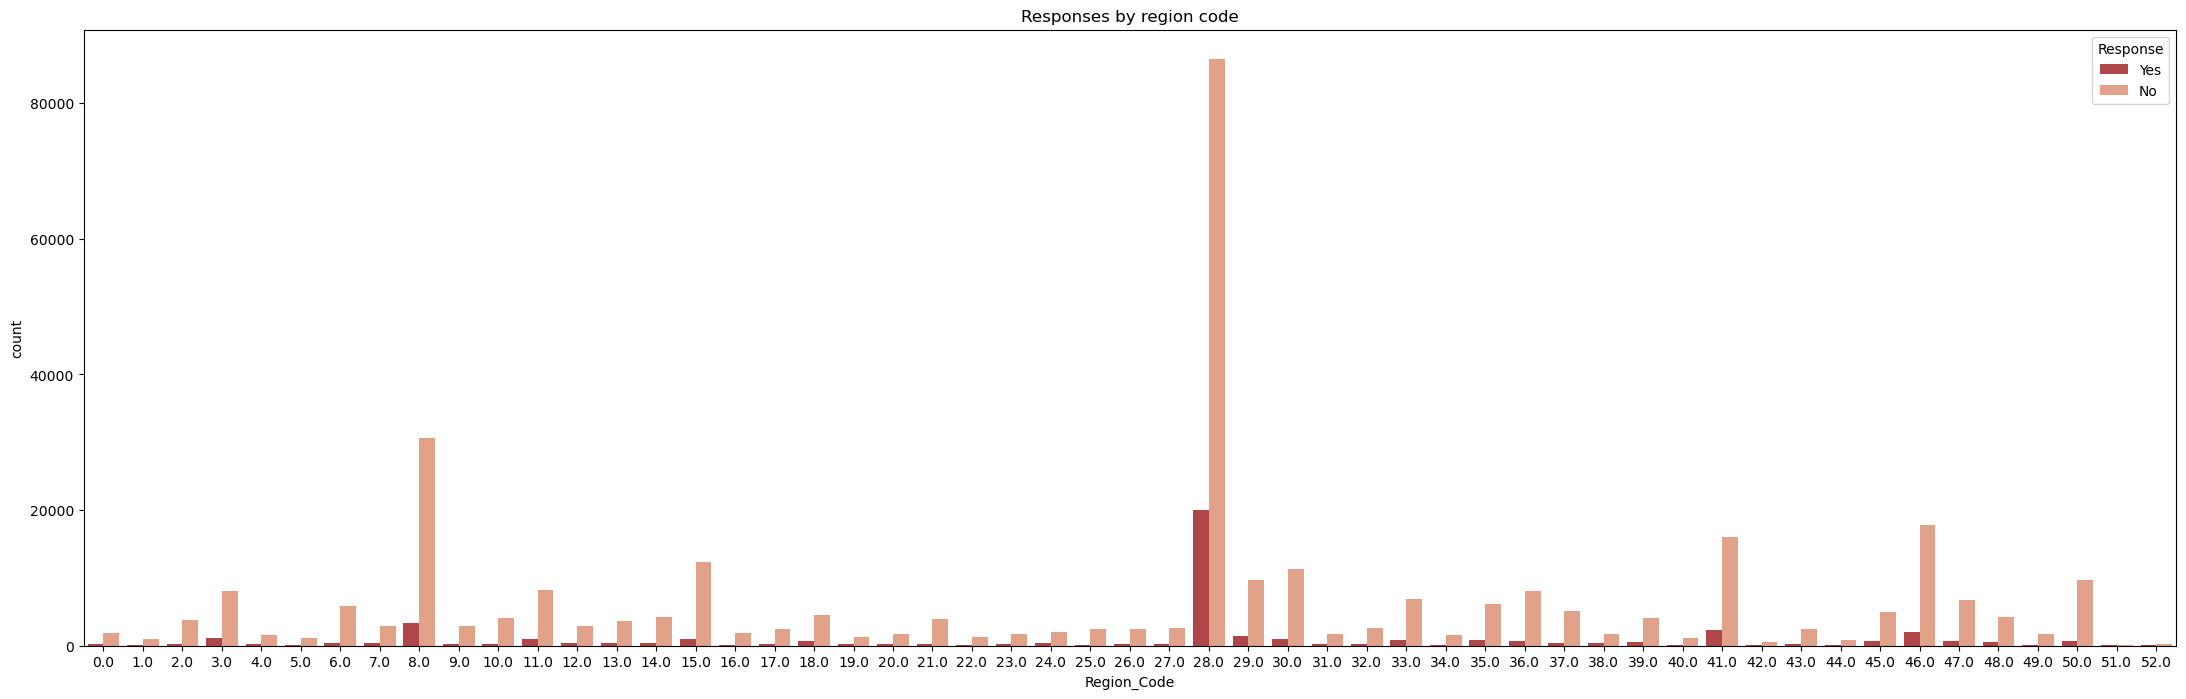

In [ ]:
# Responses by Region code
plt.figure(figsize=(27,8))
sns.countplot(df['Region_Code'],hue=df['Response'])
plt.title('Responses by region code')
plt.show()

    From the above graph we can conclude that people having region code 28 are tend to have higher response rates

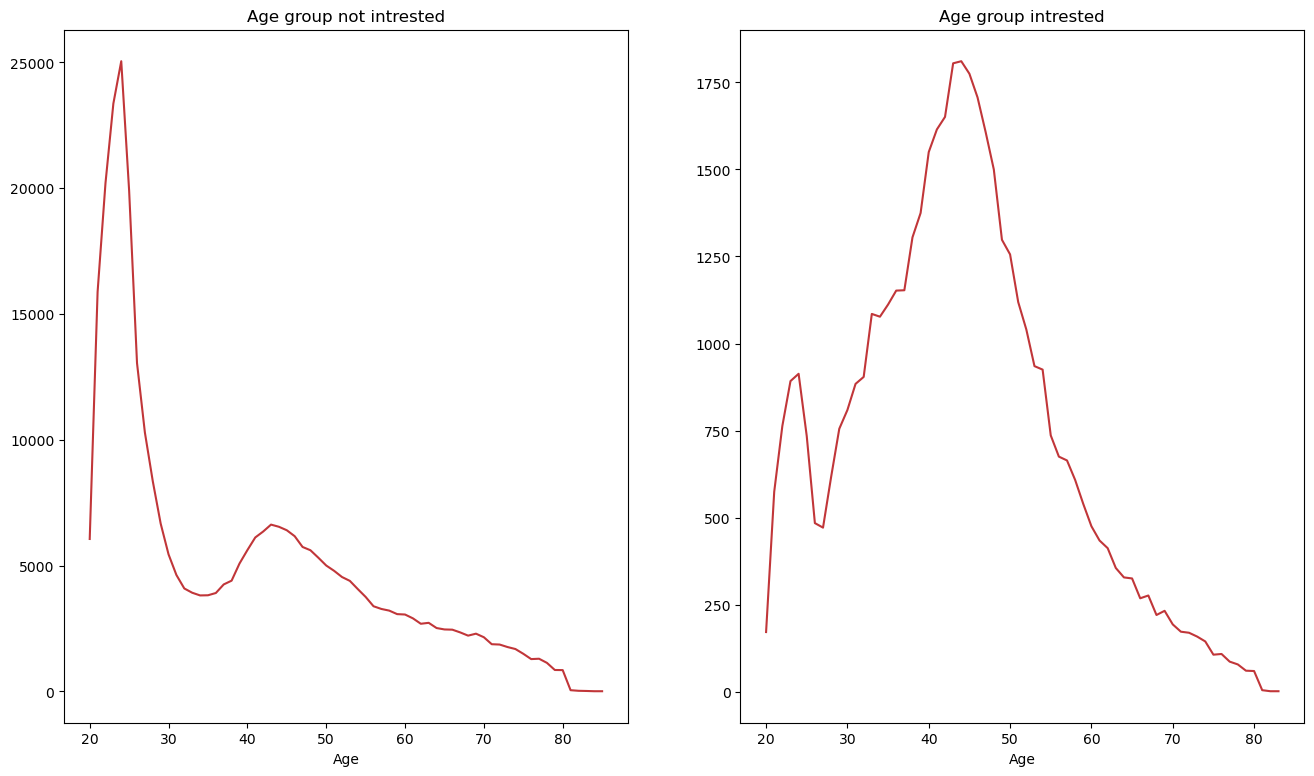

In [ ]:
# responses by age group
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
df[df['Response']=='No'].groupby('Age')['id'].count().plot()
plt.title('Age group not intrested')
plt.subplot(1,2,2)
df[df['Response']=='Yes'].groupby('Age')['id'].count().plot()
plt.title('Age group intrested')
plt.show()

    From the above graph we can conclude that ages between 20-30 are tend to have lower Response rate.
    Ages between 40-50 are tend to have higher response rate.

## Cleaning Up Data

In [ ]:
# Finding missing values
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

    There are no missing values

In [ ]:
# Finding duplicated values
df.duplicated().sum()

0

### Removing Outliers

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


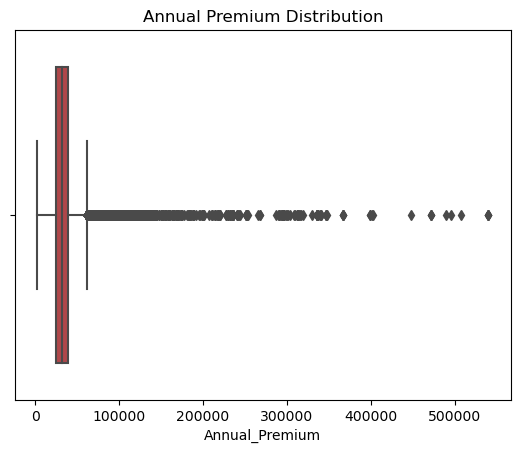

In [ ]:
# Outliers detection
sns.boxplot(df['Annual_Premium'])
plt.title('Annual Premium Distribution')
plt.show()

    We have so many outliers in the Annual Premium column.

In [ ]:
#Inter Quartile Range
Q1= np.percentile(df['Annual_Premium'],25)
Q3= np.percentile(df['Annual_Premium'],75)
IQR= Q3-Q1
IQR

14995.0

In [ ]:
# Finding lower and upper bounds
upper= Q3+(1.5*IQR)
lower= Q3-(1.5*IQR)
lower, upper

(16907.5, 61892.5)

In [ ]:
# Selecting rows to drop
df[(df.Annual_Premium >=upper) | (df.Annual_Premium <=lower)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
5,6,Female,24,Yes,33.0,No,< 1 Year,Yes,2630.0,160.0,176,No
15,16,Male,37,Yes,6.0,No,1-2 Year,Yes,2630.0,156.0,147,Yes
25,26,Female,21,Yes,28.0,Yes,< 1 Year,No,61964.0,152.0,72,No
30,31,Female,26,Yes,8.0,No,< 1 Year,No,2630.0,160.0,136,No
37,38,Female,25,Yes,28.0,Yes,< 1 Year,No,76251.0,152.0,107,No
...,...,...,...,...,...,...,...,...,...,...,...,...
381079,381080,Male,33,Yes,28.0,No,< 1 Year,Yes,69845.0,26.0,115,No
381086,381087,Female,34,Yes,35.0,No,1-2 Year,Yes,2630.0,152.0,208,No
381092,381093,Male,38,Yes,28.0,Yes,1-2 Year,No,2630.0,124.0,130,No
381094,381095,Female,47,Yes,20.0,No,1-2 Year,Yes,2630.0,26.0,84,No


In [ ]:
# Creating new dataframe after dropping outliers
df1= df.drop(index=df[(df['Annual_Premium'] >=upper) | (df['Annual_Premium'] <=lower)].index)

In [ ]:
df.shape, df1.shape

((381109, 12), (304650, 12))

In [ ]:
# Number of rows dropped
x1, y1= df.shape
x2, y2= df1.shape
f'{x1-x2} rows dropped'

'76459 rows dropped'

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


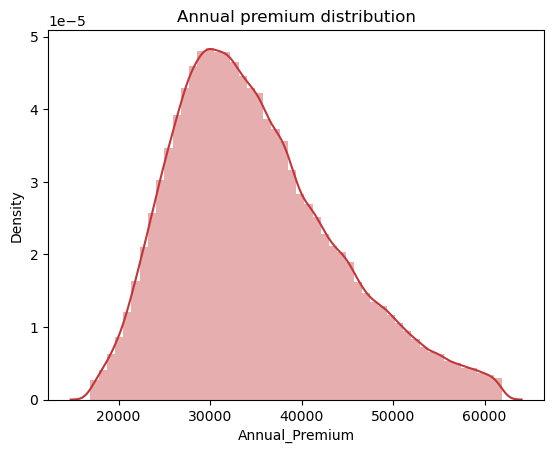

In [ ]:
# Annual Premium distribution plot after removing outliers
sns.distplot(df1['Annual_Premium'])
plt.title('Annual premium distribution')
plt.show()

## Feature Engineering

### 1. Feature Encoding

In [ ]:
# Using Label encoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Encoding columns using Label Encoder
df1['Driving_License']=le.fit_transform(df1['Driving_License'])
df1['Previously_Insured']=le.fit_transform(df1['Previously_Insured'])
df1['Response']=le.fit_transform(df1['Response'])
df1['Gender']=le.fit_transform(df1['Gender'])
df1['Vehicle_Damage']=le.fit_transform(df1['Vehicle_Damage'])
df1['Vehicle_Age']=le.fit_transform(df1['Vehicle_Age'])

In [ ]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### 2. Removing Multicollinearity

<AxesSubplot:title={'center':'Correlation Plot'}>

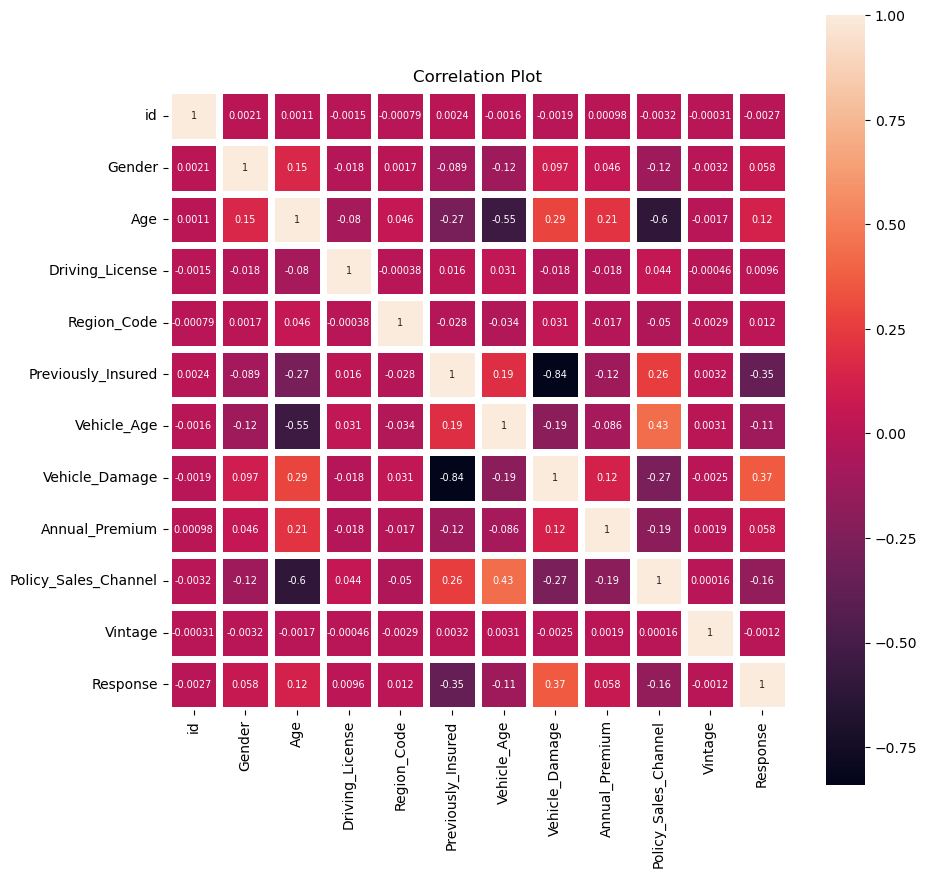

In [ ]:
# Correlation heatmap between column
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(df1.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 7})

From the above heatmap there are extreme negative correlation between `Previously_Insured` : `Vehicle_Damage`

    Since, both of them are categorical variables I am not removing or scaling those variables. Because they don't create multi collinearity issues

## Pre-Processing

### 1. Feature Scaling

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


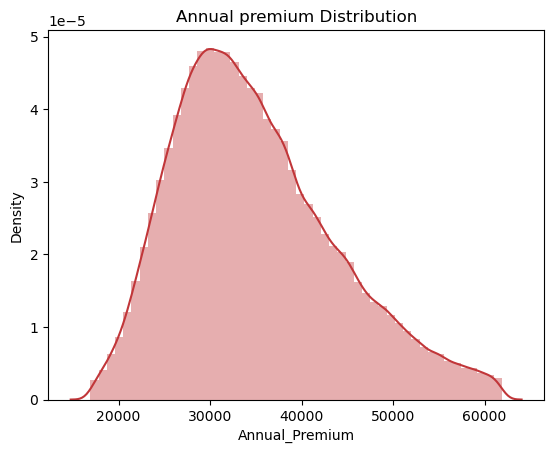

In [ ]:
# Visualing Annual Premium Distribution
sns.distplot(df1['Annual_Premium'])
plt.title('Annual premium Distribution')
plt.show()

    The Annual premium distribution is significantly close to normal distribution. So, we can use standard scaler to scale these values

In [ ]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()
# Scaling values
df1['Annual_Premium']=sc.fit_transform(df1['Annual_Premium'].values.reshape(-1, 1))

In [ ]:
sc.mean_,sc.var_

(array([34994.31326768]), array([79833625.65173699]))

/home/shakti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


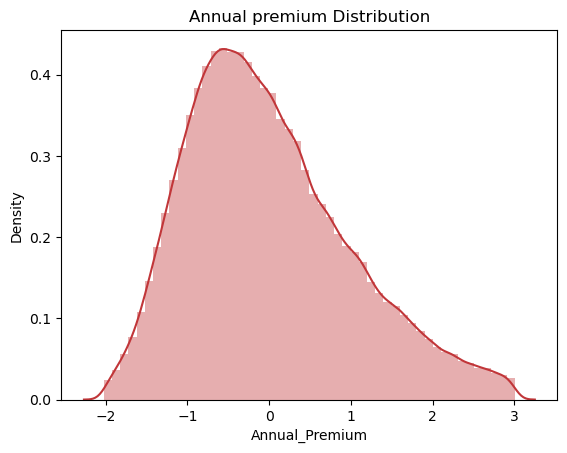

In [ ]:
# Distribution after scaling
sns.distplot(df1['Annual_Premium'])
plt.title('Annual premium Distribution')
plt.show()

### 2. Imbalance Handeling

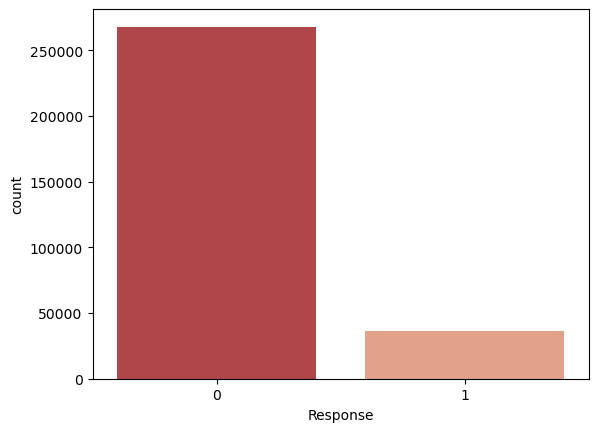

In [ ]:
# Finding imbalance in dataset
class_distribution = df1['Response'].value_counts()
sns.countplot(data=df1, x='Response')
plt.show()

    Response 0(No) is significantly higher than 1(Yes)

In [ ]:
# Finding class ratios
class_ratios = df1['Response'].value_counts() / len(df1['Response'])
class_ratios

0    0.87998
1    0.12002
Name: Response, dtype: float64

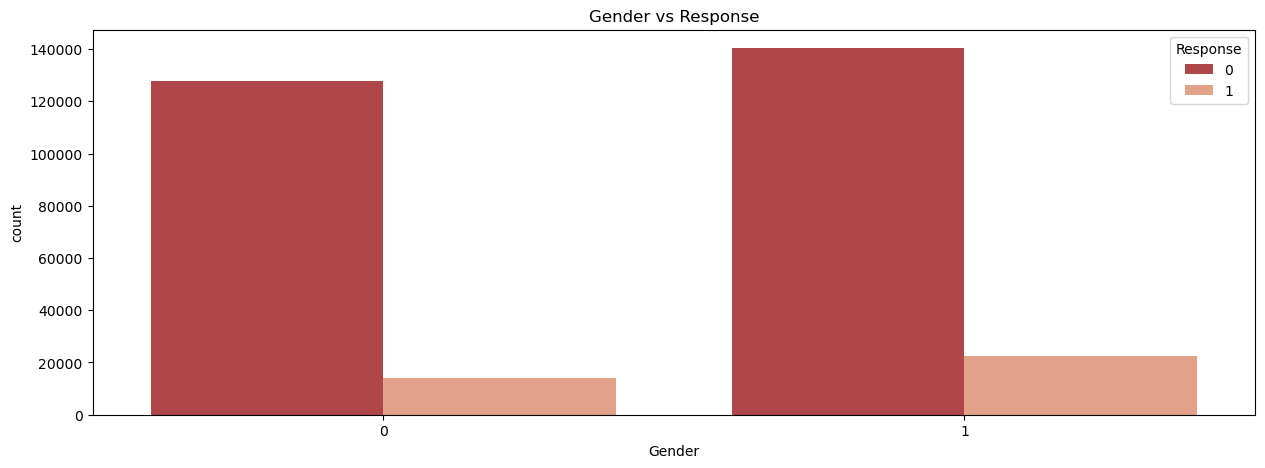

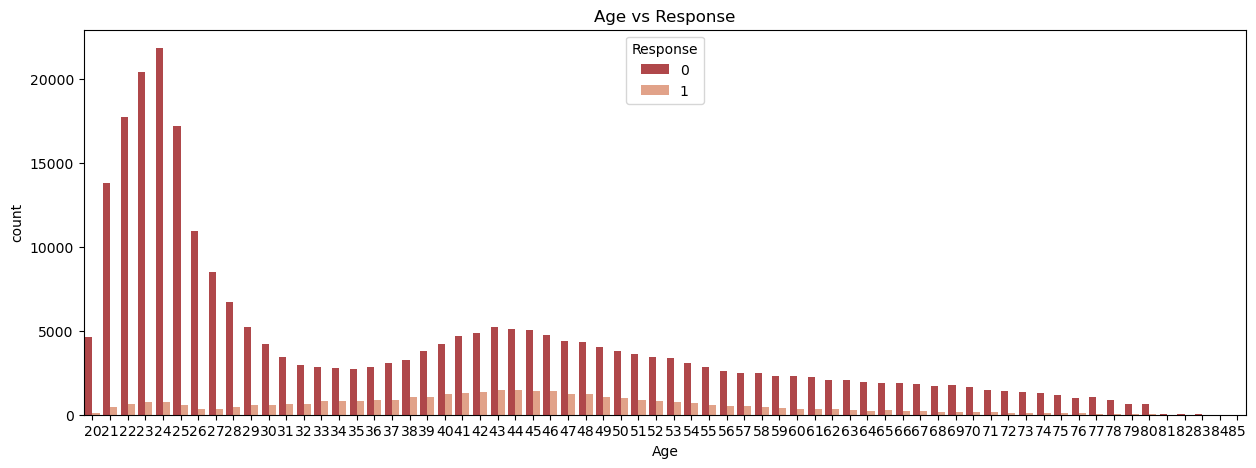

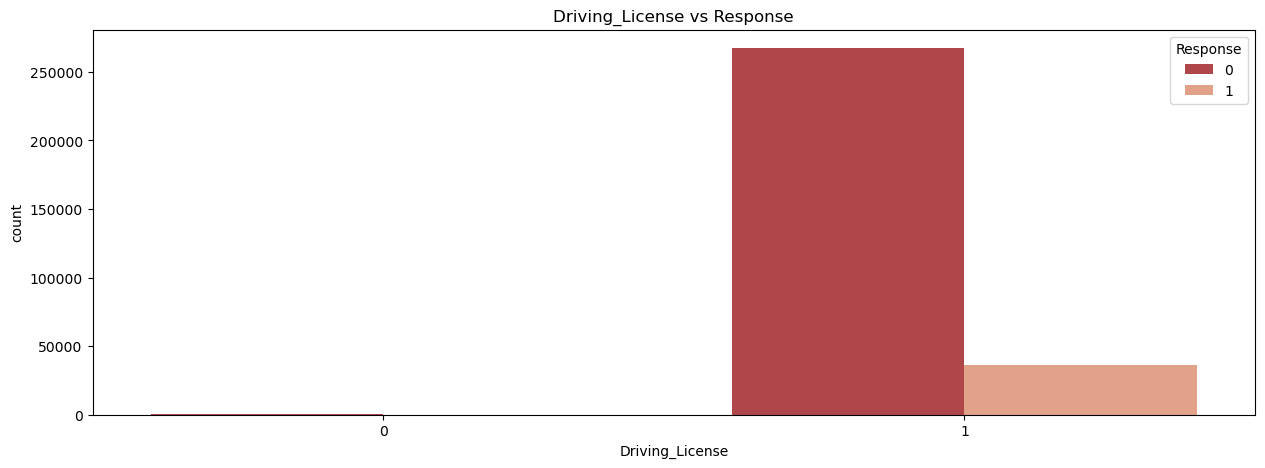

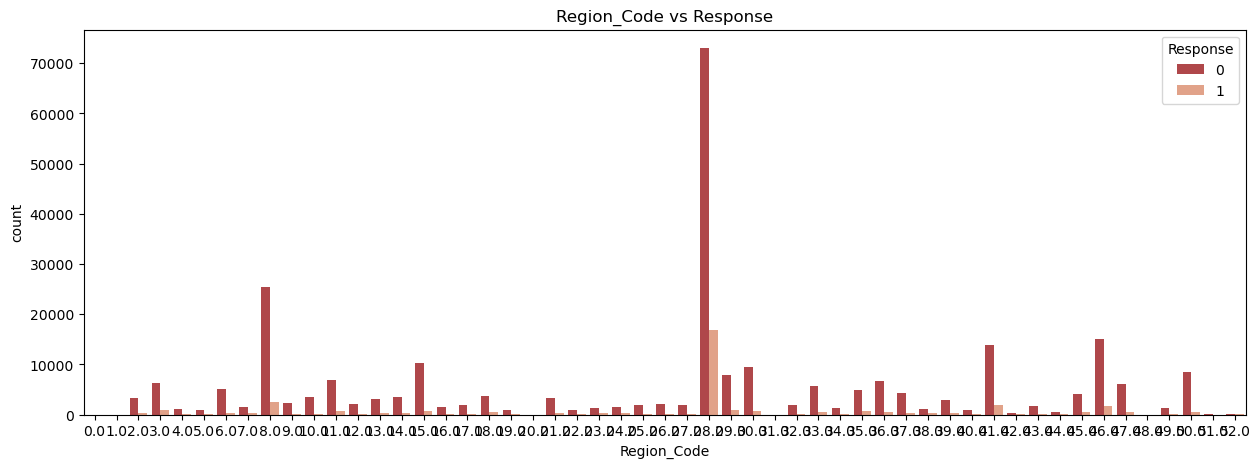

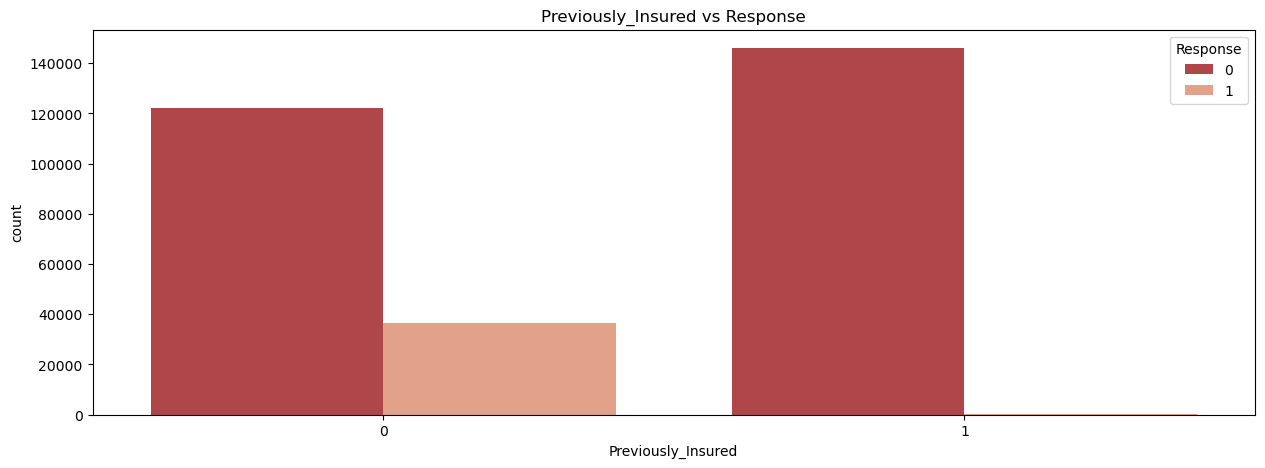

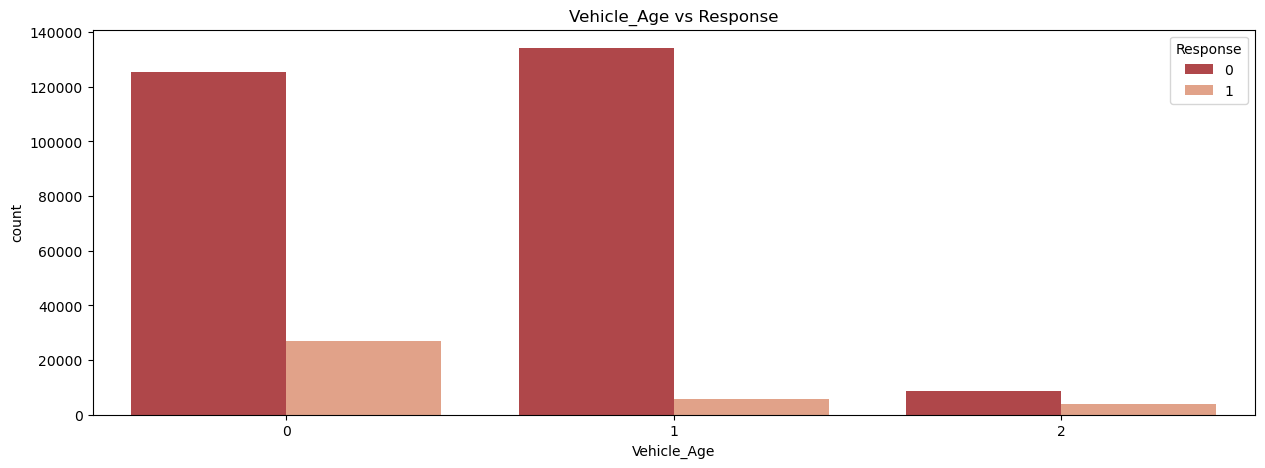

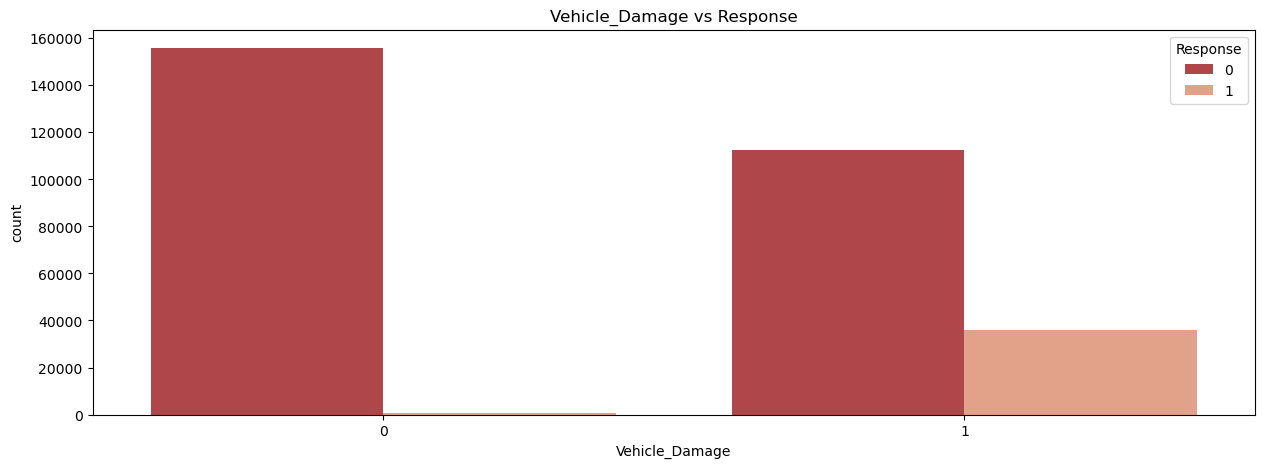

In [ ]:
# Imbalance from other columns
for cols in ['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df1,x=cols,hue='Response')
    plt.title(f'{cols} vs Response')
    plt.show()

In [ ]:
# Using SMOTE method for resampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df1.drop('Response', axis=1), df1['Response'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

Text(0.5, 1.0, 'Over sampled data')

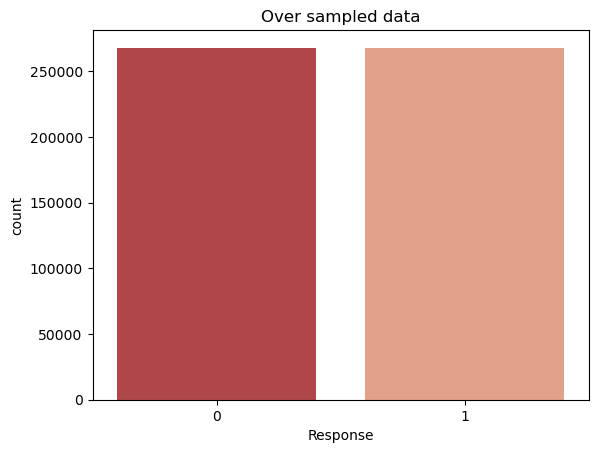

In [ ]:
# Visualing imbalance after resampling
sns.countplot(data=oversampled, x='Response')
plt.title('Over sampled data')

In [ ]:
# Value counts
oversampled['Response'].value_counts()

1    268086
0    268086
Name: Response, dtype: int64

In [ ]:
# Dropping Id column and creating new dataframe
df2= oversampled.drop('id',axis=1)

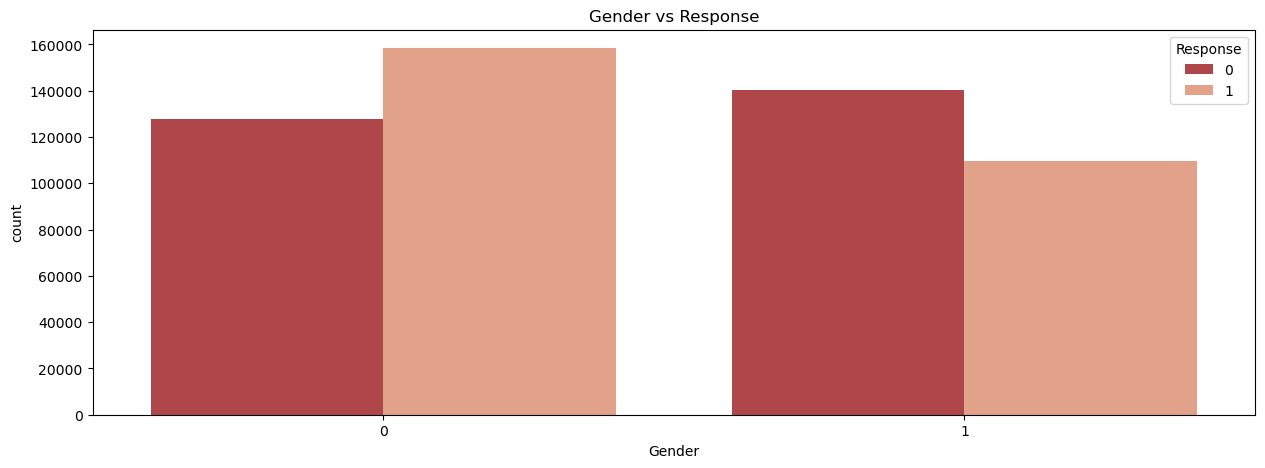

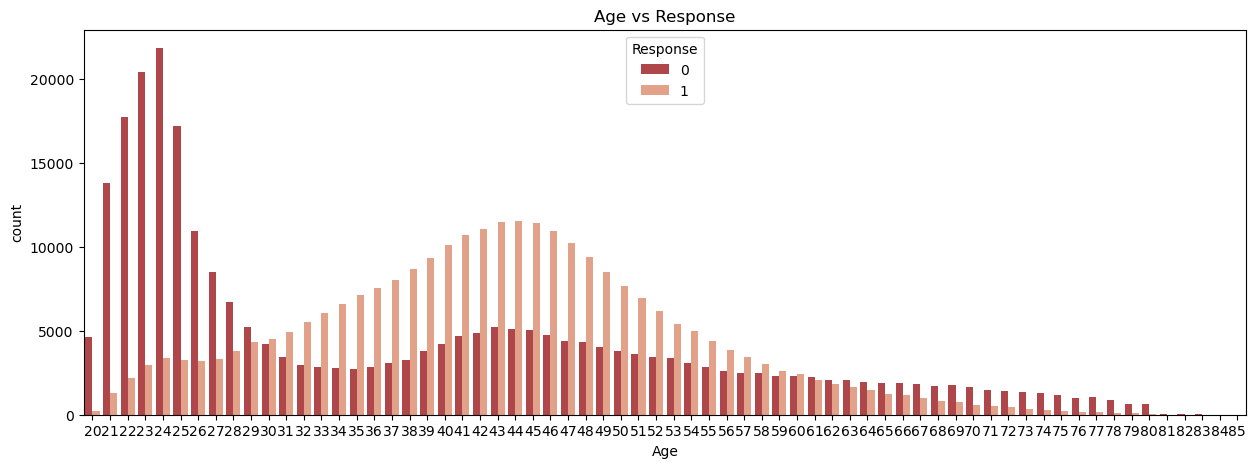

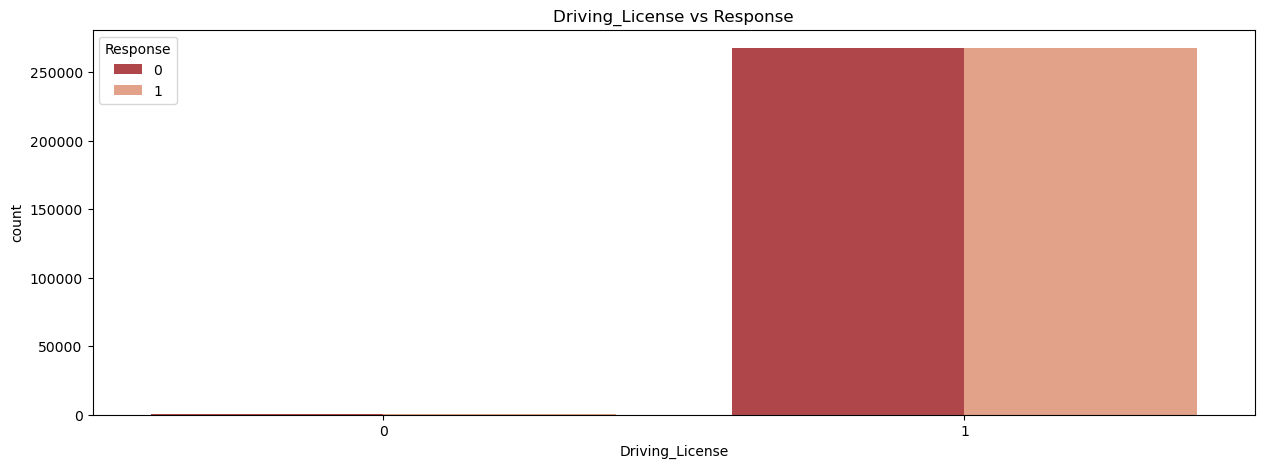

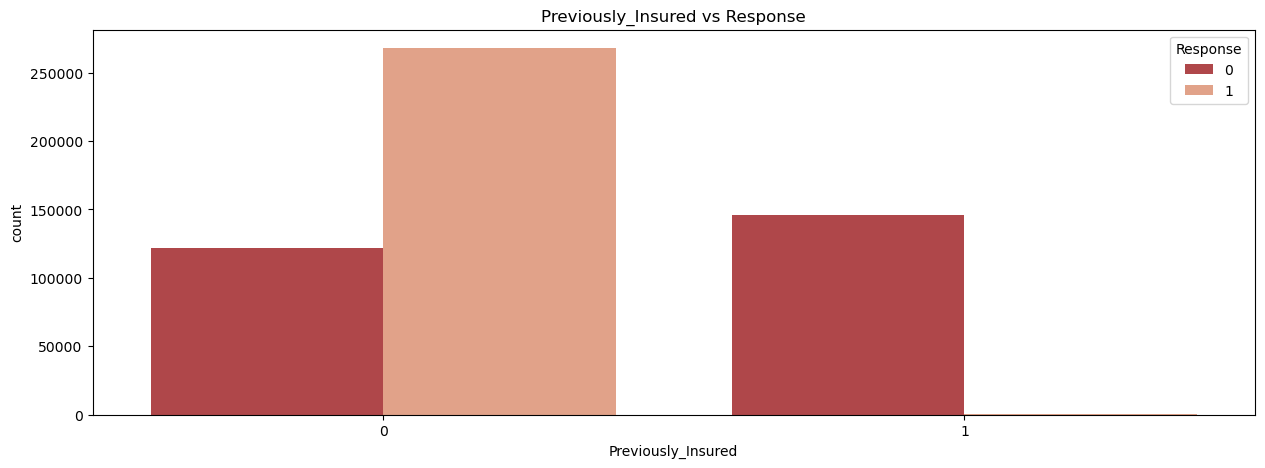

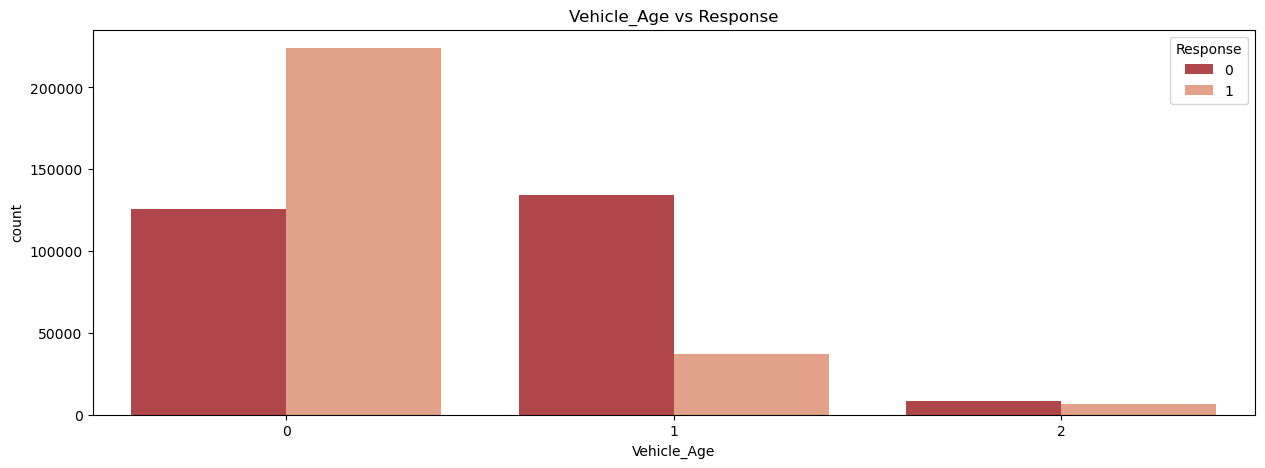

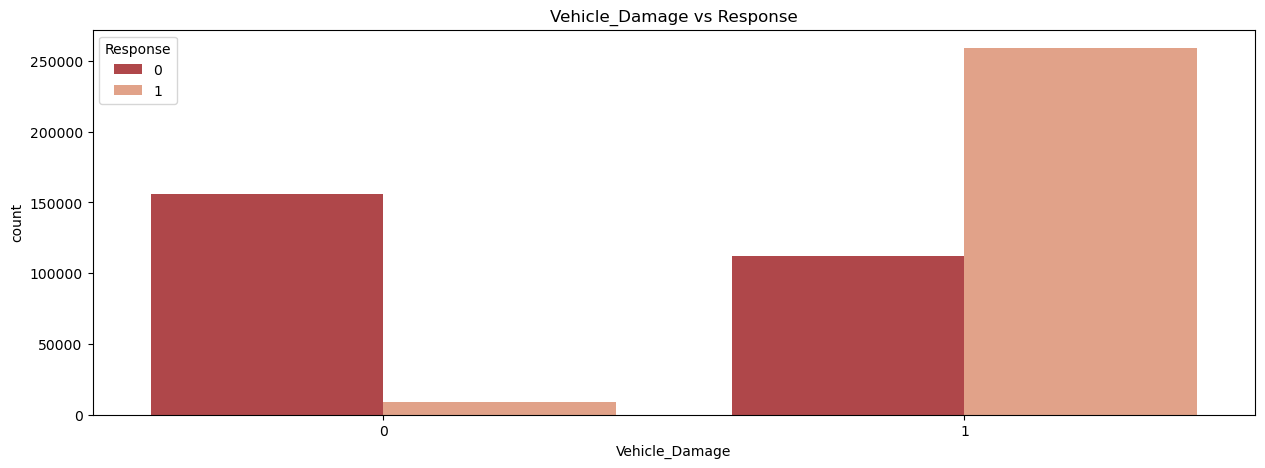

In [ ]:
# Visualing over sampled data
for cols in ['Gender', 'Age', 'Driving_License','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df2,x=cols,hue='Response')
    plt.title(f'{cols} vs Response')
    plt.show()

In [ ]:
df2.head()

,Response,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,0.611047,26.0,217
1,0,1,76,1,3.0,0,0,0,-0.163214,26.0,183
2,1,1,47,1,28.0,0,2,1,0.369300,26.0,27
3,0,1,21,1,11.0,1,1,0,-0.713524,152.0,203
4,0,0,29,1,41.0,1,1,0,-0.839210,152.0,39


## Model Implementation

In [ ]:
# Splitting X and Y variables
Y= df2.iloc[:,0]
X= df2.drop('Response',axis=1)

In [ ]:
X.shape, Y.shape

((536172, 10), (536172,))

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

### Finding Best Model

In [ ]:
# Importing modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

In [ ]:
results = []

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Loop through each model, train, predict, and evaluate
for model_name, model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # For AUC score, we need predicted probabilities for the positive class
    y_test_prob = model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)

    results.append([model_name, train_accuracy, test_accuracy, precision, recall, f1, auc_score])

/home/shakti/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shakti/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

In [ ]:
# Create a Pandas DataFrame to display the results in a table
result_df = pd.DataFrame(results, columns=["Model", "Training Accuracy", "Testing Accuracy", "Precision", "Recall", "F1 Score", "AUC Score"])

In [ ]:
result_df

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.796563,0.797804,0.743391,0.910959,0.818688,0.865582
1,Decision Tree,1.000000,0.872123,0.872158,0.872743,0.872450,0.872122
2,Random Forest,0.999990,0.885425,0.881578,0.891054,0.886291,0.963857
3,K-Nearest Neighbors,0.858884,0.790933,0.778614,0.814340,0.796076,0.867181
4,AdaBoost,0.850595,0.851503,0.809843,0.919593,0.861236,0.936743
5,Gradient Boosting,0.864307,0.864663,0.823913,0.928332,0.873011,0.950658
6,XGBoost,0.887725,0.883784,0.876784,0.893674,0.885148,0.964896


    From the above table it is clear that Random Forest, XGBoost and Decision tree are the best models to use for this dataset

    I am using XGBoost for modeling dataset


### Hyper parameter tuning

In [ ]:
# Defining estimator
# Here we are using binary:logistic as objective since our response variable has two classes
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
# Defining parameters
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Using GridSearchCV for hyper parameter tuning
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
# Fitting the training data
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/shakti/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [ ]:
# Finding best parameters
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}

In [ ]:
grid_search.best_estimator_,grid_search.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=9, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=180, n_jobs=None, nthread=4,
               num_parallel_tree=None, ...),
 0.9657143000741548)

In [ ]:
best_model= grid_search.best_estimator_

In [ ]:
# Training Model
best_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [ ]:
best_model.score(x_test,y_test)

0.8847832411987198

### Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Defining Evaluation Method
def model_evaluation(best_model, x_test, y_test):

    print("Testing Classification Report: ")
    print(classification_report(y_test, best_model.predict(x_test)))

    # Confusion Matrix
    print("Confusion Matrix: ")
    cm = confusion_matrix(y_test, best_model.predict(x_test))
    names = ['True Negetive','False Positive','False Negetive','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     66872
           1       0.88      0.89      0.89     67171

    accuracy                           0.88    134043
   macro avg       0.88      0.88      0.88    134043
weighted avg       0.88      0.88      0.88    134043

Confusion Matrix: 


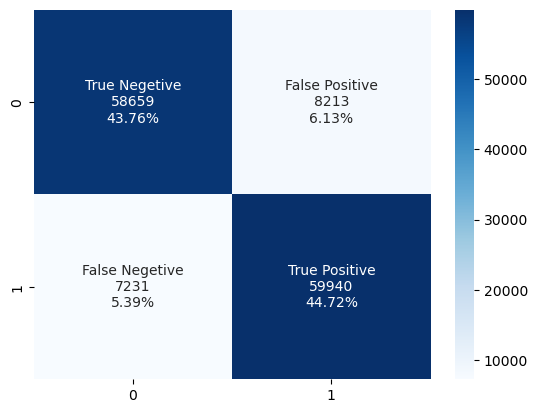

In [ ]:
model_evaluation(best_model, x_test, y_test)

## Feature Importance

In [ ]:
# Defining method for feature importance
def feature_importance(best_model, x_train):
    x_columns = x_train.columns
    feature_rank = pd.DataFrame({'feature': x_columns, 'importance':best_model.feature_importances_})
    feature_rank = feature_rank.sort_values('importance', ascending = False)
    plt.figure(figsize=(13.5,6))
    sns.barplot(y = 'feature', x = 'importance', data = feature_rank)

    feature_rank['cumsum'] = feature_rank['importance'].cumsum() * 100
    print(feature_rank.head(10))

                feature  importance     cumsum
4    Previously_Insured    0.970739  97.073898
5           Vehicle_Age    0.007559  97.829834
6        Vehicle_Damage    0.006169  98.446716
8  Policy_Sales_Channel    0.005173  98.964027
3           Region_Code    0.003751  99.339088
0                Gender    0.002851  99.624229
1                   Age    0.002318  99.855980
2       Driving_License    0.000771  99.933128
7        Annual_Premium    0.000370  99.970154
9               Vintage    0.000298  99.999985


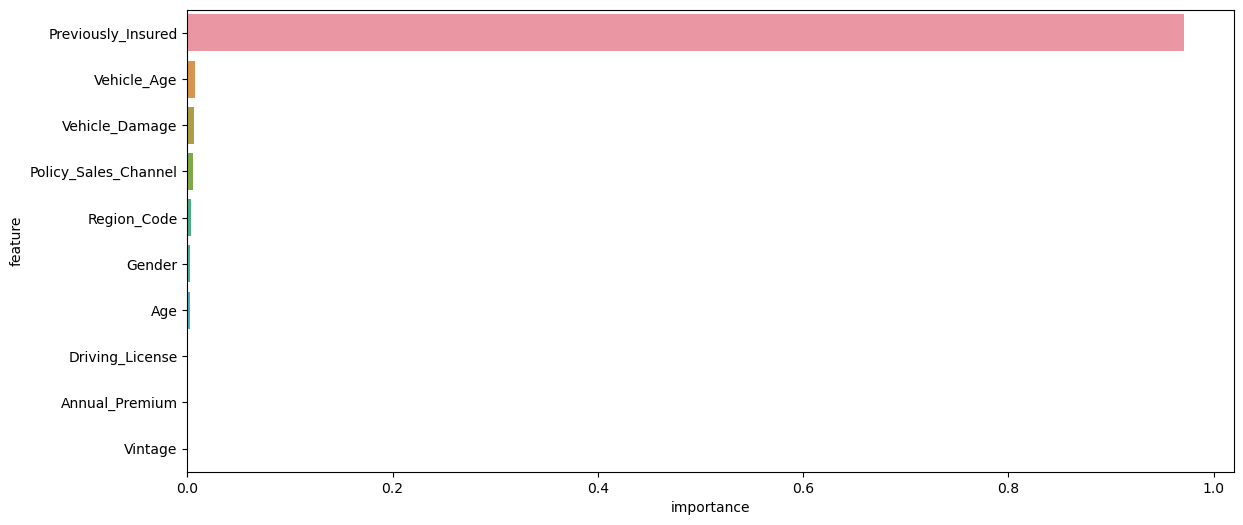

In [ ]:
feature_importance(best_model, x_train)

## Conclusion

    Our target variable is greatly influenced by previously insured column.
    The accuracy score for test data is 88.47% which means our model performed very well for test data.
    There are 6.13% are false positives and 5.39% are false negatives. Those are identified wrong.
    We didnot have any multi collinearity issues in our data.
    The age group between 20-30 are less likely to have intrest.
    The age group between 40-50 are most likely to have intrest.
    People those are not previously insured are most likely to have intrest.